<a href="https://colab.research.google.com/github/panfiloow/House-Price-Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and importing libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Data loading

In [18]:
!wget https://raw.githubusercontent.com/panfiloow/House-Price-Prediction/main/data/test.csv
!wget https://raw.githubusercontent.com/panfiloow/House-Price-Prediction/main/data/train.csv

--2024-10-22 17:33:57--  https://raw.githubusercontent.com/panfiloow/House-Price-Prediction/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 440.83K  --.-KB/s    in 0.05s   

2024-10-22 17:33:58 (8.79 MB/s) - ‘test.csv’ saved [451405/451405]

--2024-10-22 17:33:58--  https://raw.githubusercontent.com/panfiloow/House-Price-Prediction/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [tex

In [19]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Dataset information

In [22]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Model training

In [98]:
def create_features(df):
    df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
    df['Age'] = 2024 - df['YearBuilt']
    return df

train_df = create_features(train_df)
test_df = create_features(test_df)

In [99]:
X = train_df[['TotalArea', 'Age', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition' ]]
X_encoded = pd.get_dummies(X, drop_first=True)
y = train_df['SalePrice']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [101]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [102]:
y_pred = model.predict(X_test)

# Evaluating model performance

In [139]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 17790.670787671235
R^2 Score: 0.8870332831825405


In [138]:
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-кратная кросс-валидация
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')

Cross-validated scores: [0.8847517  0.82784662 0.87806995 0.8894056  0.82009908]
Mean CV score: 0.8600345882203015


# Obtaining predictions for test data

In [105]:
X_test_final = test_df[['TotalArea', 'Age', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition' ]]
X_test_final_encoded = pd.get_dummies(X_test_final, drop_first=True)
X_test_final_encoded = X_test_final_encoded.reindex(columns=X_encoded.columns, fill_value=0)
predictions = model.predict(X_test_final_encoded)
test_df['PredictedSalePrice'] = predictions

In [106]:
test_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea,Age,PredictedSalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,1778.0,63,127849.50
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,2658.0,66,164239.30
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,2557.0,27,183947.85
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,2530.0,26,186962.58
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,1,2010,WD,Normal,2560.0,32,208257.54
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,2418.0,31,182911.40
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,GdPrv,Shed,500,3,2010,WD,Normal,2355.0,32,178723.91
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,5,2010,WD,Normal,2254.0,26,175151.00
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2010,WD,Normal,2641.0,34,193297.19
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,4,2010,WD,Normal,1764.0,54,125485.00


# Visualization

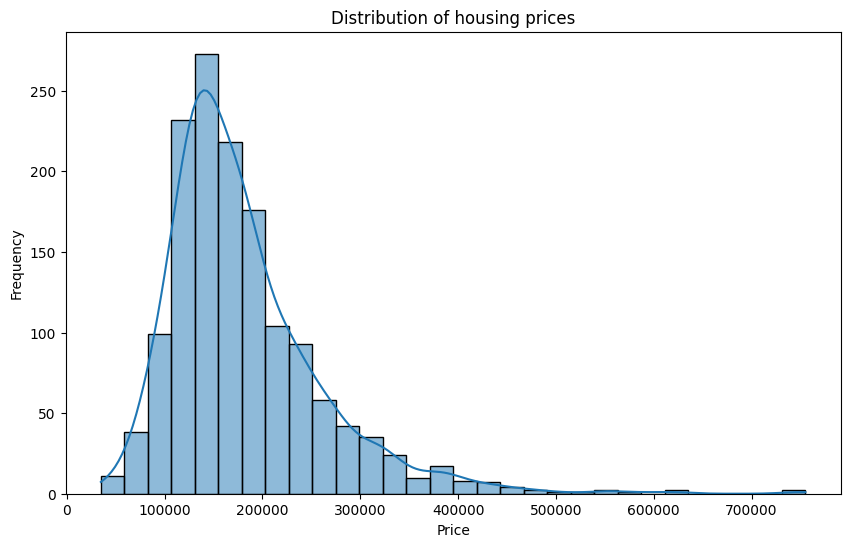

In [140]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of housing prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-141-3ab31b3574de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_features.values, y=top_20_features.index, palette='coolwarm')


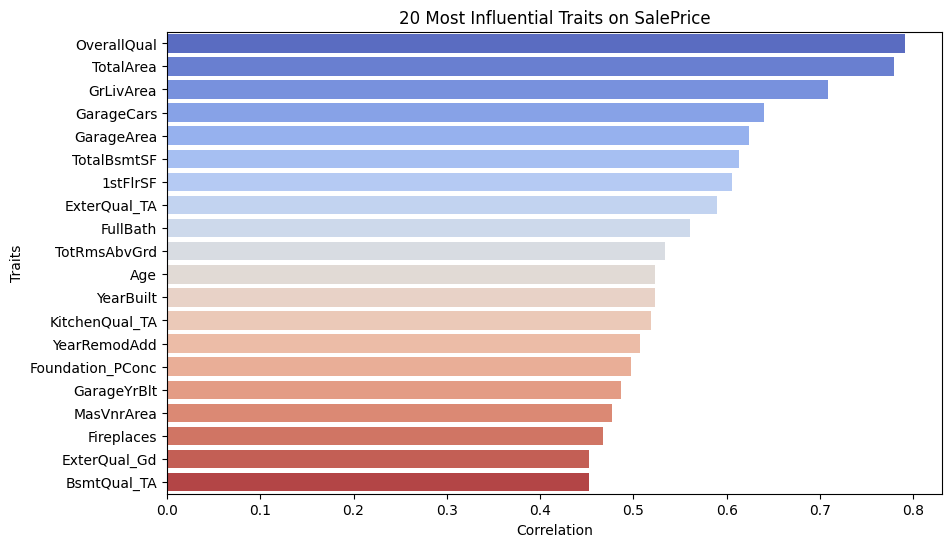

In [141]:
data_encoded = pd.get_dummies(train_df, drop_first=True)
correlation = data_encoded.corr()['SalePrice'].abs()
top_20_features = correlation.sort_values(ascending=False).head(21)
top_20_features = top_20_features.drop('SalePrice')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_features.values, y=top_20_features.index, palette='coolwarm')
plt.title('20 Most Influential Traits on SalePrice')
plt.xlabel('Correlation')
plt.ylabel('Traits')
plt.show()

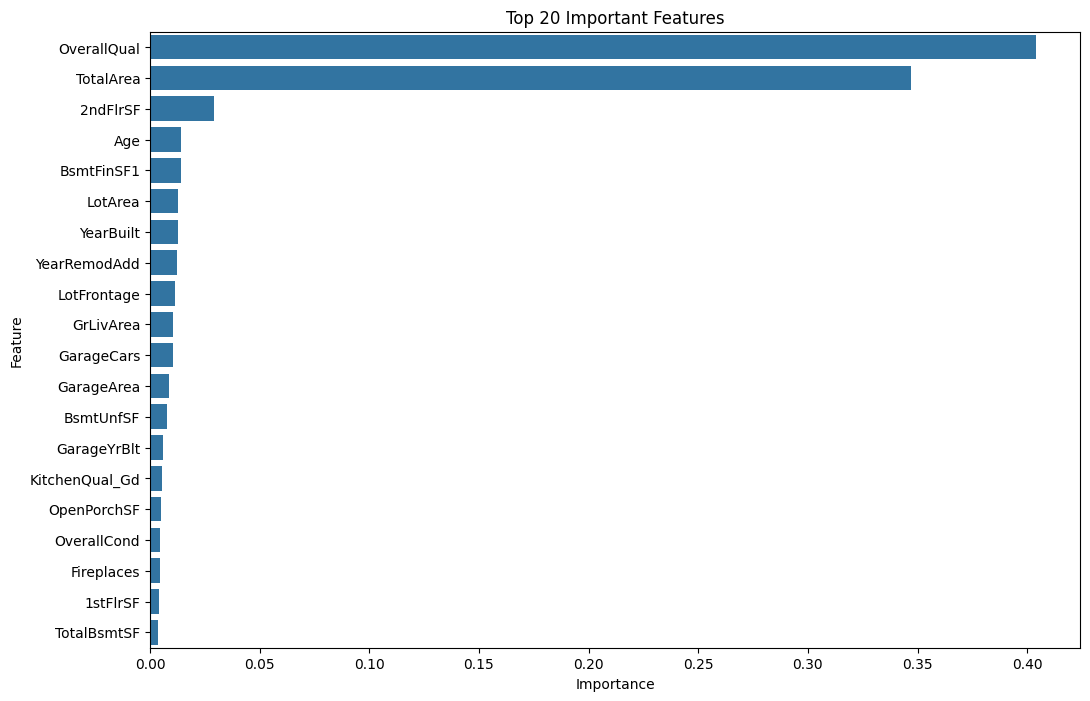

In [130]:
importances = model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns,
                                       'Importance': importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('20 most influential features on the model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

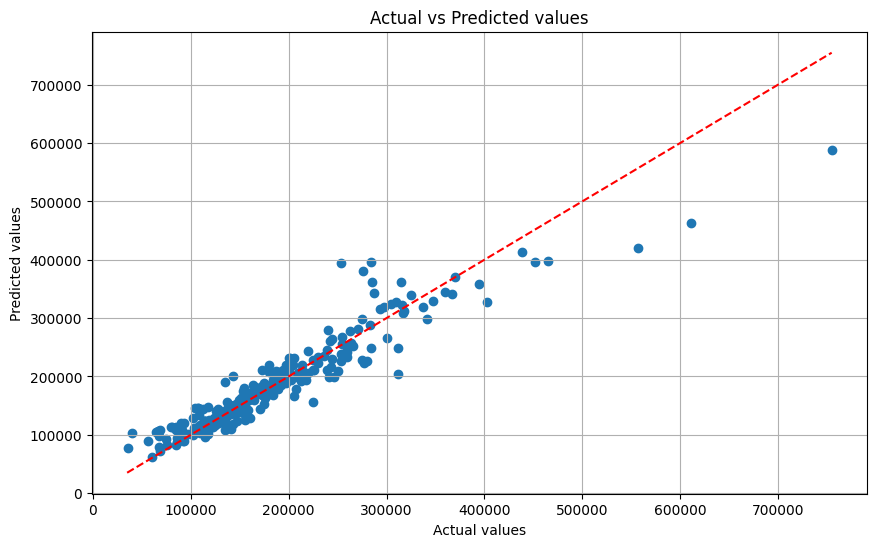

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.grid()
plt.show()

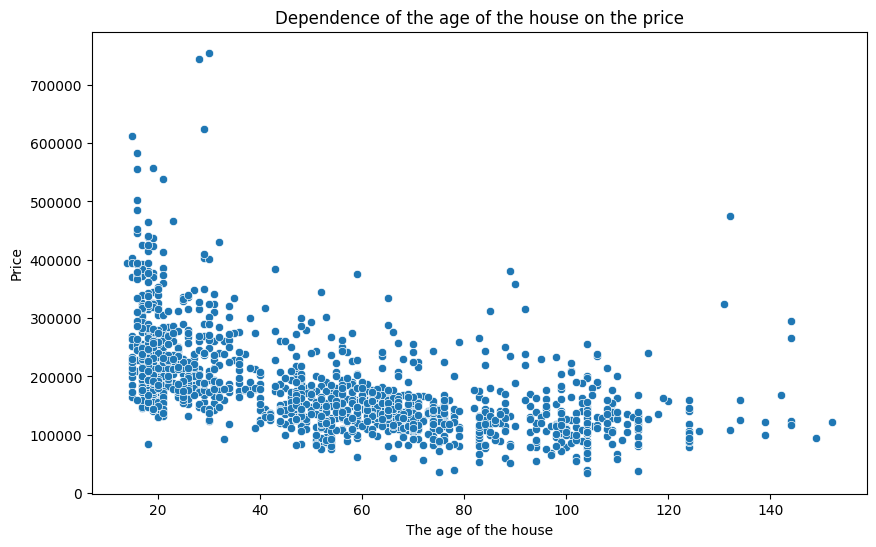

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='SalePrice', data=train_df)
plt.title('Dependence of the age of the house on the price')
plt.xlabel('The age of the house')
plt.ylabel('Price')
plt.show()

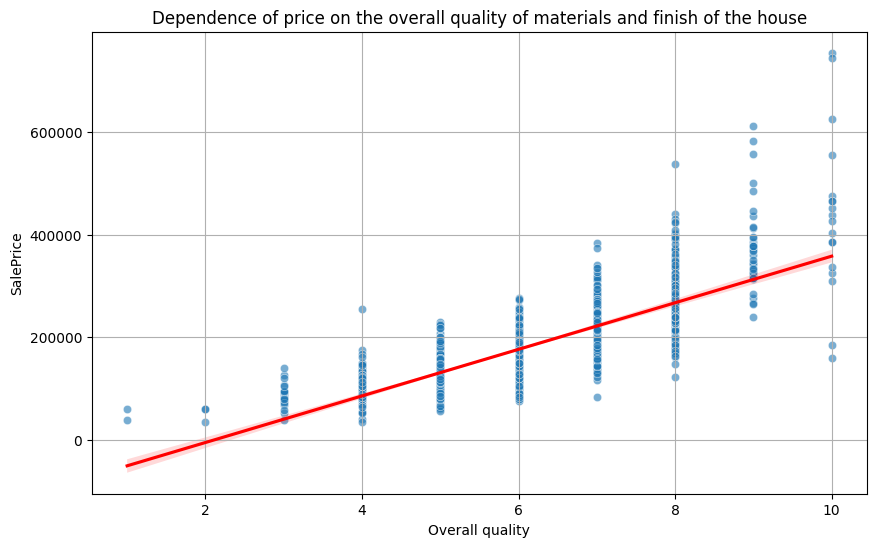

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='OverallQual', y='SalePrice', alpha=0.6)


sns.regplot(data=data_encoded, x='OverallQual', y='SalePrice', scatter=False, color='red')
plt.title('Dependence of price on the overall quality of materials and finish of the house')
plt.xlabel('Overall quality')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

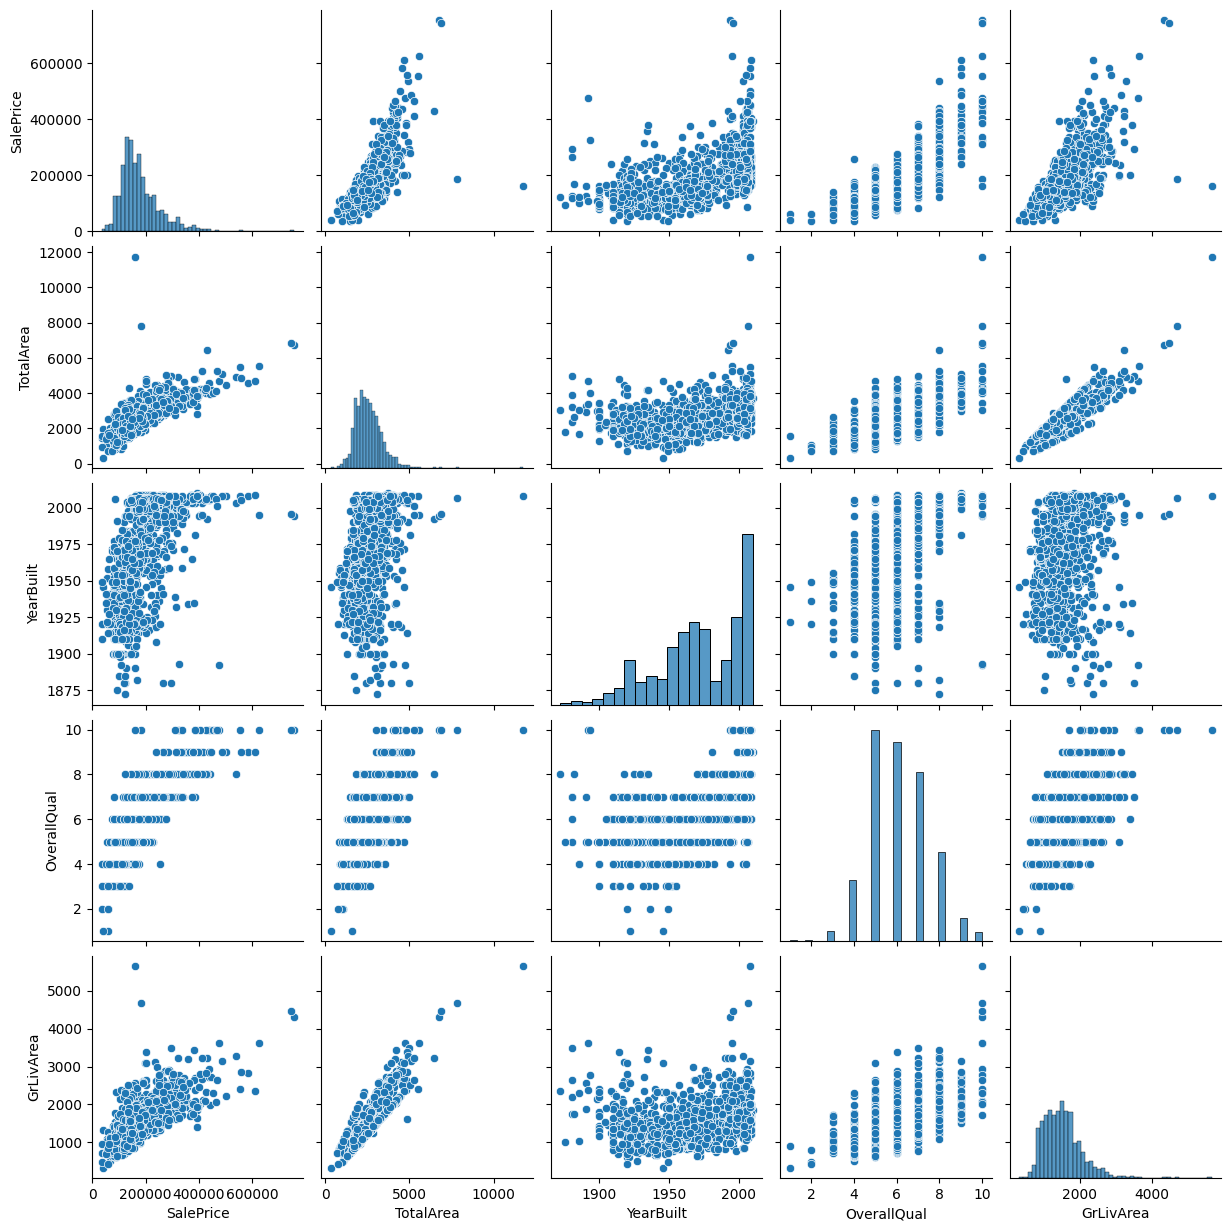

In [145]:
selected_features = ['SalePrice', 'TotalArea', 'YearBuilt', 'OverallQual', 'GrLivArea']
sns.pairplot(train_df[selected_features])
plt.show()

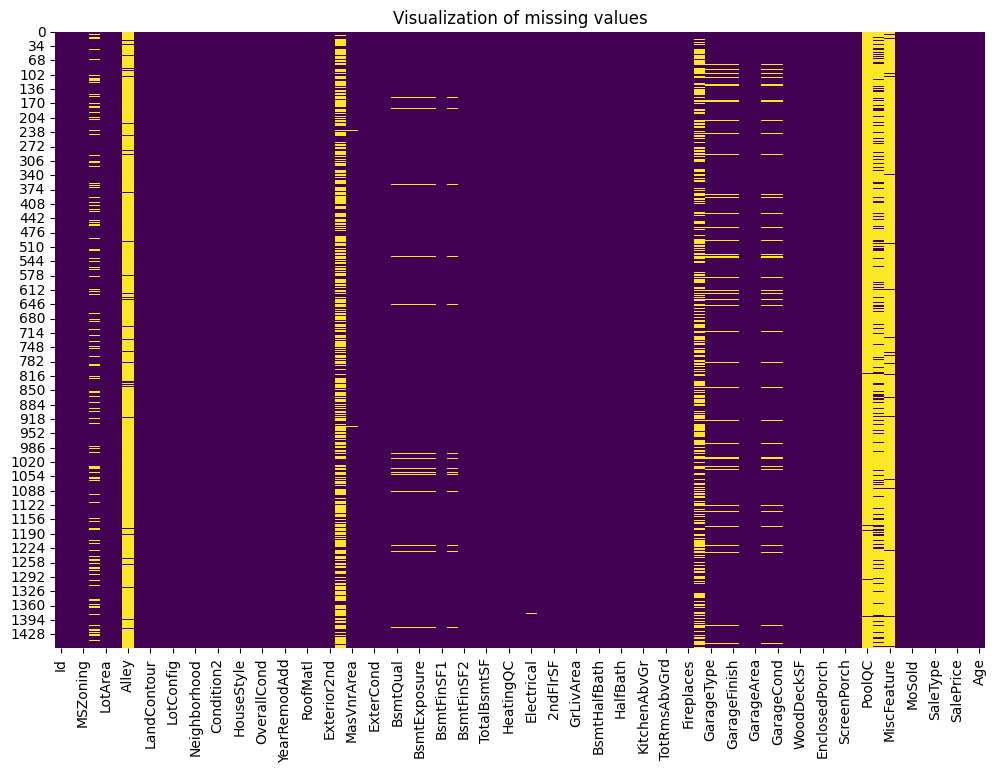

In [146]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualization of missing values')
plt.show()

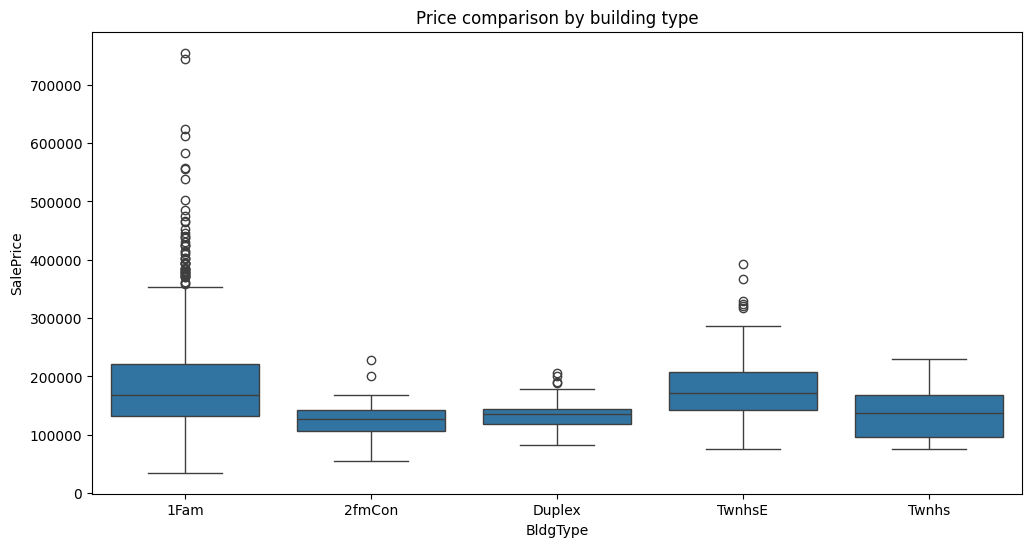

In [147]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=train_df)
plt.title('Price comparison by building type')
plt.show()

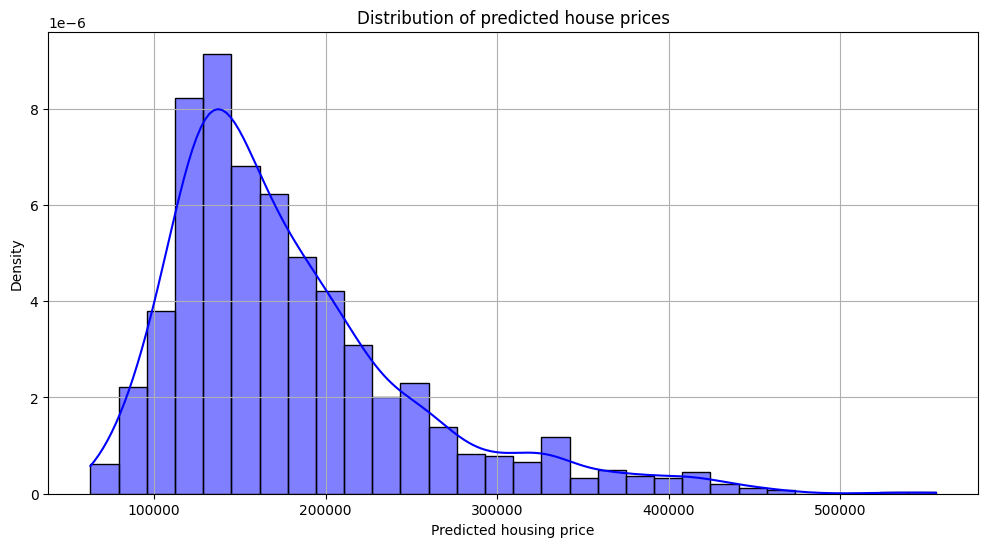

In [148]:
plt.figure(figsize=(12, 6))
sns.histplot(test_df['PredictedSalePrice'], bins=30, kde=True, color='blue', stat='density')
plt.title('Distribution of predicted house prices')
plt.xlabel('Predicted housing price')
plt.ylabel('Density')
plt.grid(True)
plt.show()